Python CIVW GUI
========

**Run the cell below to start the GUI** (Select it and press ctrl + enter)

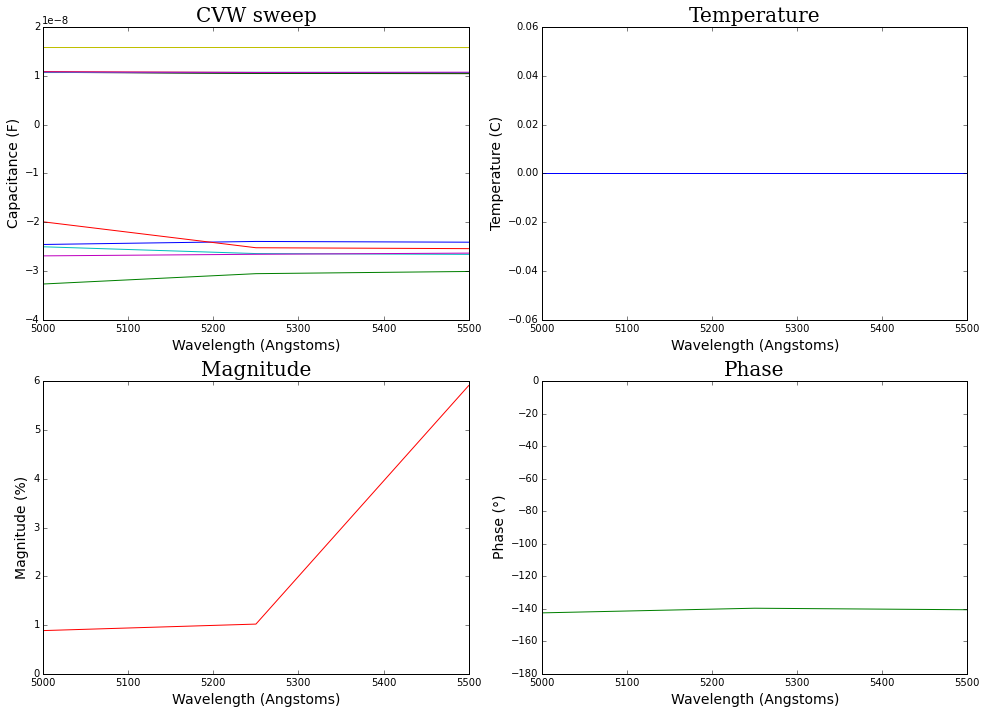

In [1]:
%matplotlib inline
from libs import ipynb4200
ipynb4200.boot_GUI()